# Proyecto de DS para empresa de comercio electrónico

## <span style="color:Orange"> Contexto Acerca del Informe
Una empresa internacional de comercio electrónico desea descubrir conocimientos clave a partir de su base de datos de clientes. Se realiza un análisis buscando un modelo que trate de aprender a partir de los datos históricos para predecir si un nuevo pedido llegará a tiempo o no.

## <span style="color:Orange"> Variable objetivo: <span style="color:white"> Entrega a tiempo (Si / No), 

La variable objetivo seleccionada "Reached.on.Time_Y.N", indica si un pedido llegó a tiempo (1) o no (0). Esta es la variable que se busca predecir utilizando las otras características del dataset, como el número de llamadas al servicio al cliente, el costo del producto, el descuento ofrecido al cliente, etc.

## <span style="color:Orange"> Factores clave

Las 4 características seleccionadas que más influyen en la predicción de si un pedido llega a tiempo son:

- Customer_care_calls (Número de llamadas al servicio de atención al cliente).

- Cost_of_the_Product (Costo del producto).

- Discount_offered (Descuento ofrecido).

- Weight_in_gms (Peso en gramos).

Estas conclusiones se obtuvieron utilizando la técnica de selección de características SelectKBest del paquete scikit-learn. Esta técnica evalúa cada característica del dataset y selecciona las más relevantes para predecir la variable objetivo, que en este caso es si un pedido llega a tiempo o no.

Las características seleccionadas proporcionan una visión clara de los factores que más afectan la puntualidad en las entregas. Identificar estos factores permite optimizar los procesos internos, enfocarse en las variables con mayor impacto y mejorar la logística para reducir los retrasos y aumentar la satisfacción del cliente


## <span style="color:Orange"> Algoritmo de Clasificación

El Algoritmo de clasificación seleccionado es Random Forest.
El modelo proporciona una base útil para entender los factores que influyen en la puntualidad de las entregas, pero hay margen para mejorar su precisión y capacidad predictiva. Exactitud del modelo: 66%

## <span style="color:Orange"> Conclusiones

El modelo de Random Forest utilizado para predecir si un pedido llegará a tiempo presenta un rendimiento moderado, con una exactitud general del 66.2%. El modelo tiene mejor capacidad para predecir los pedidos que llegan a tiempo (precisión de 0.73) en comparación con los pedidos tardíos (precisión de 0.58). Esto indica que el modelo tiene dificultades para identificar los pedidos que podrían llegar tarde, lo cual limita su efectividad para prever problemas logísticos.

Las características seleccionadas (número de llamadas al servicio al cliente, costo del producto, descuento ofrecido y peso del producto) nos permiten identificar los principales factores que afectan la puntualidad de los pedidos. Esta información es crucial para enfocar los esfuerzos de mejora en dichas áreas.

Dado el rendimiento actual, existe una oportunidad de mejora significativa. Podría ser beneficioso optimizar el modelo ajustando sus hiperparámetros o incluso probando otros algoritmos más avanzados, como Gradient Boosting o XGBoost, para lograr una mayor precisión y mejorar la capacidad predictiva del modelo. El algoritmo 






## <span style="color:Orange">  Fuente del dataset 

"E-Commerce Shipping Data"

                            https://www.kaggle.com/datasets/prachi13/customer-analytics?resource=download                      









<pre>

<center><h1> DESARROLLO DEL REPORTE </h1></center>
El conjunto de datos utilizado para la construcción del modelo presenta 10,999 observaciones de 12 variables. La información contenida en los datos es la siguiente:

- **ID**: Número de identificación de los clientes.
- **Bloque de almacén**: La empresa tiene almacenes divididos en bloques 5 bloques (A, B, C, D y E).
- **Modo de envío**: La empresa envía los productos de diversas maneras (barco, avión y carretera).
- **Llamadas de atención al cliente**: Contempla el número de llamadas realizadas para consultas sobre el envío.
- **Calificación del cliente**: La empresa ha recibido una calificación de cada cliente. 1 es la más baja (peor) y 5 es la más alta (mejor).
- **Costo del producto**: Costo del producto en dólares estadounidenses.
- **Compras previas**: El número de compras previas.
- **Importancia del producto**: La empresa ha categorizado el producto según varios parámetros como bajo, medio y alto.
- **Género**: Masculino y femenino.
- **Descuento ofrecido**: Descuento ofrecido en ese producto específico.
- **Peso en gramos**: El peso en gramos de cada envío.
- **Entrega a tiempo**: Es la variable objetivo, donde 1 indica que el producto NO ha llegado a tiempo y 0 indica que ha llegado a tiempo.

<center><h1>  <span style="color:PINK"> PRIMERA ENTREGA </h1></center>

# <span style="color:Orange">ETAPA 1: Se importan las galerias y los datos

## A continuación se cargan todas las galerías empleadas en el proyecto:


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Se importa el set de datos
### Se descarga archivo en formato CSV junto con la presentación de las primeras 5 filas (head) y todas las columnas, con la finalidad de comenzar a manejar la información contenida en el set de datos:


In [35]:
archivo_csv = r"C:\Users\alvar\Desktop\CODERHOUSE\DATA SCIENCE\1 - PROYECTO\E-Commerce Shipping (Pipeline) + Prediction\Train.csv"
df = pd.read_csv(archivo_csv)
print(df.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

# <span style="color:Orange">ETAPA 2: Análisis preliminar de los datos
## Se analizan una por una las columnas, para evaluar la integridad de la información y el tipo de contenido:

In [36]:
# Contar la cantidad de IDs únicos
print('COLUMNA "ID": Número de identificación de los clientes')
print('')
unique_ids = df['ID'].nunique()
print(f"Cantidad de IDs únicos: {unique_ids}")

# Ver el tipo de dato de la columna ID
id_dtype = df['ID'].dtype
print(f"Tipo de dato de la columna ID: {id_dtype}")

# Obtener el número de filas y columnas del DataFrame
num_filas, num_columnas = df.shape

# Mostrar el número de filas (líneas)
print(f"El archivo CSV tiene: {num_filas} líneas")



COLUMNA "ID": Número de identificación de los clientes

Cantidad de IDs únicos: 10999
Tipo de dato de la columna ID: int64
El archivo CSV tiene: 10999 líneas


In [37]:
# Contar la cantidad de valores únicos en la columna "Warehouse_block"
print('COLUMNA "Warehouse_block": La empresa tiene un almacén que está dividido en los bloques A, B, C, D, E.')
print('')
unique_warehouse_blocks = df['Warehouse_block'].nunique()
print(f"Cantidad de valores únicos en 'Warehouse_block': {unique_warehouse_blocks}")

# Ver el tipo de dato de la columna "Warehouse_block"
warehouse_block_dtype = df['Warehouse_block'].dtype
print(f"Tipo de dato de la columna 'Warehouse_block': {warehouse_block_dtype}")

# Mostrar los valores únicos y la cantidad de registros en la columna "Warehouse_block"
warehouse_block_values = df['Warehouse_block'].value_counts()


print(warehouse_block_values)

# Mostrar los valores únicos en "Warehouse_block"
unique_warehouse_blocks = df['Warehouse_block'].unique()

print(f"Valores únicos en 'Warehouse_block': {unique_warehouse_blocks}")

COLUMNA "Warehouse_block": La empresa tiene un almacén que está dividido en los bloques A, B, C, D, E.

Cantidad de valores únicos en 'Warehouse_block': 5
Tipo de dato de la columna 'Warehouse_block': object
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64
Valores únicos en 'Warehouse_block': ['D' 'F' 'A' 'B' 'C']


In [38]:
# Contar la cantidad de valores únicos en la columna "Mode_of_Shipment"
print('COLUMNA "Mode_of_Shipment": La empresa envía los productos en barco, avión y por carretera.')
print('')
unique_mode_of_shipment = df['Mode_of_Shipment'].nunique()
print(f"Cantidad de valores únicos en 'Mode_of_Shipment': {unique_mode_of_shipment}")

# Ver el tipo de dato de la columna "Mode_of_Shipment"
mode_of_shipment_dtype = df['Mode_of_Shipment'].dtype
print(f"Tipo de dato de la columna 'Mode_of_Shipment': {mode_of_shipment_dtype}")

# Mostrar los valores únicos y la cantidad de registros en la columna "Mode_of_Shipment"
mode_of_shipment_values = df['Mode_of_Shipment'].value_counts()
print(mode_of_shipment_values)

# Mostrar los valores únicos en "Mode_of_Shipment"
unique_mode_of_shipment_values = df['Mode_of_Shipment'].unique()

print(f"Valores únicos en 'Mode_of_Shipment': {unique_mode_of_shipment_values}")

COLUMNA "Mode_of_Shipment": La empresa envía los productos en barco, avión y por carretera.

Cantidad de valores únicos en 'Mode_of_Shipment': 3
Tipo de dato de la columna 'Mode_of_Shipment': object
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64
Valores únicos en 'Mode_of_Shipment': ['Flight' 'Ship' 'Road']


COLUMNA "Customer_care_calls": Representa al número de llamadas realizadas para consultas sobre el envío.

Cantidad de valores únicos en 'Customer_care_calls': 6
Tipo de dato de la columna 'Customer_care_calls': int64
Customer_care_calls
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: count, dtype: int64
Valores únicos en 'Customer_care_calls': [4 2 3 5 6 7]


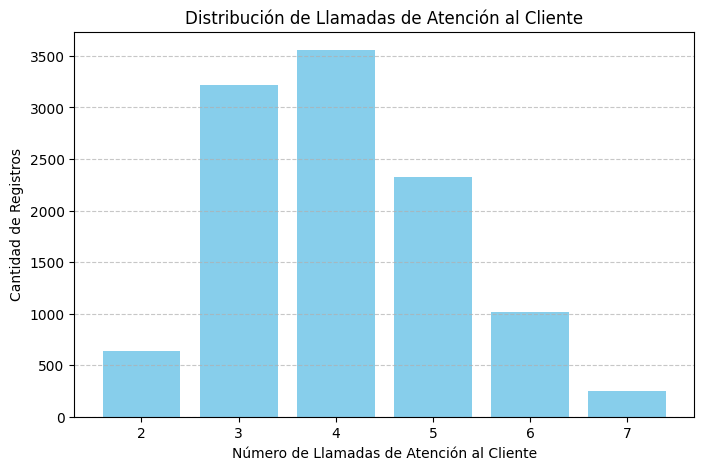

In [39]:
# Contar la cantidad de valores únicos en la columna "Customer_care_calls"
print('COLUMNA "Customer_care_calls": Representa al número de llamadas realizadas para consultas sobre el envío.')
print('')
unique_customer_care_calls = df['Customer_care_calls'].nunique()
print(f"Cantidad de valores únicos en 'Customer_care_calls': {unique_customer_care_calls}")

# Ver el tipo de dato de la columna "Customer_care_calls"
customer_care_calls_dtype = df['Customer_care_calls'].dtype
print(f"Tipo de dato de la columna 'Customer_care_calls': {customer_care_calls_dtype}")

# Mostrar los valores únicos y la cantidad de registros en la columna "Customer_care_calls"
customer_care_calls_values = df['Customer_care_calls'].value_counts()
print(customer_care_calls_values)

# Mostrar los valores únicos en "Customer_care_calls"
unique_customer_care_calls_values = df['Customer_care_calls'].unique()
print(f"Valores únicos en 'Customer_care_calls': {unique_customer_care_calls_values}")

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(customer_care_calls_values.index, customer_care_calls_values.values, color='skyblue')
plt.xlabel('Número de Llamadas de Atención al Cliente')
plt.ylabel('Cantidad de Registros')
plt.title('Distribución de Llamadas de Atención al Cliente')
plt.xticks(customer_care_calls_values.index)  # Mostrar los valores únicos en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


In [40]:
# Contar la cantidad de valores únicos en la columna "Customer_rating"
print('COLUMNA "Customer_rating": La empresa ha recibido una calificación de cada cliente. 1 es la más baja (peor) y 5 es la más alta (mejor).')
print('')
unique_customer_rating = df['Customer_rating'].nunique()
print(f"Cantidad de valores únicos en 'Customer_rating': {unique_customer_rating}")

# Ver el tipo de dato de la columna "Customer_rating"
customer_rating_dtype = df['Customer_rating'].dtype
print(f"Tipo de dato de la columna 'Customer_rating': {customer_rating_dtype}")

# Mostrar los valores únicos y la cantidad de registros en la columna "Customer_rating"
customer_rating_values = df['Customer_rating'].value_counts()
print(customer_rating_values)

# Mostrar los valores únicos en "Customer_rating"
unique_customer_rating_values = df['Customer_rating'].unique()
print(f"Valores únicos en 'Customer_rating': {unique_customer_rating_values}")


COLUMNA "Customer_rating": La empresa ha recibido una calificación de cada cliente. 1 es la más baja (peor) y 5 es la más alta (mejor).

Cantidad de valores únicos en 'Customer_rating': 5
Tipo de dato de la columna 'Customer_rating': int64
Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64
Valores únicos en 'Customer_rating': [2 5 3 1 4]


In [41]:
# Contar la cantidad de valores únicos en la columna "Cost_of_the_Product"
print('COLUMNA "Cost_of_the_Product": Costo del producto en dólares estadounidenses.')
print('')
unique_cost_of_product = df['Cost_of_the_Product'].nunique()
print(f"Cantidad de valores únicos en 'Cost_of_the_Product': {unique_cost_of_product}")

# Ver el tipo de dato de la columna "Cost_of_the_Product"
cost_of_product_dtype = df['Cost_of_the_Product'].dtype
print(f"Tipo de dato de la columna 'Cost_of_the_Product': {cost_of_product_dtype}")
print('')

# Resumen estadístico para la columna "Cost_of_the_Product"
cost_of_product_stats = df['Cost_of_the_Product'].describe().round(0)

print(cost_of_product_stats)

# Información adicional:
print('')
print("Interpretación del resumen estadístico:")
print("")
print("count: Cantidad de valores.")
print("mean: Promedio.")
print("std: Desviación estándar.")
print("min y max: Valores mínimo y máximo.")
print("25%, 50%, 75%: Percentiles que muestran la distribución de los costos.")

COLUMNA "Cost_of_the_Product": Costo del producto en dólares estadounidenses.

Cantidad de valores únicos en 'Cost_of_the_Product': 215
Tipo de dato de la columna 'Cost_of_the_Product': int64

count    10999.0
mean       210.0
std         48.0
min         96.0
25%        169.0
50%        214.0
75%        251.0
max        310.0
Name: Cost_of_the_Product, dtype: float64

Interpretación del resumen estadístico:

count: Cantidad de valores.
mean: Promedio.
std: Desviación estándar.
min y max: Valores mínimo y máximo.
25%, 50%, 75%: Percentiles que muestran la distribución de los costos.


COLUMNA "Prior_purchases": Se corresponde con el número de compras previas.

Cantidad de valores únicos en 'Prior_purchases': 8
Tipo de dato de la columna 'Prior_purchases': int64
Prior_purchases
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: count, dtype: int64
Valores únicos en 'Prior_purchases': [ 3  2  4  6  5  7 10  8]


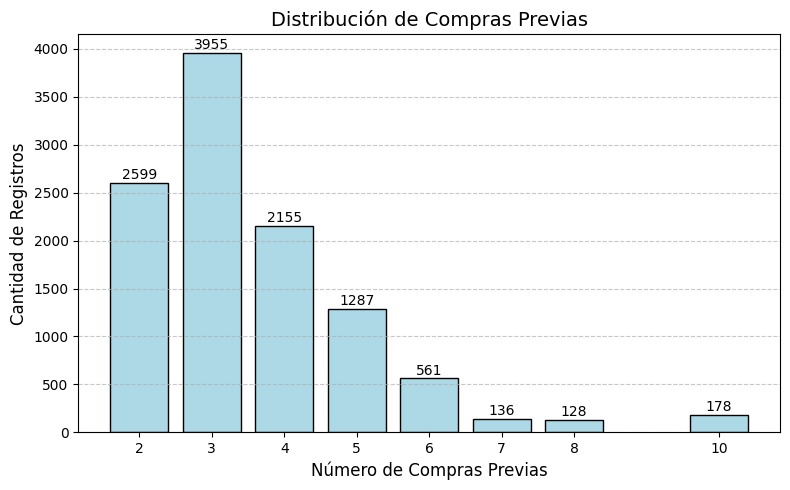

In [42]:
# Contar la cantidad de valores únicos en la columna "Prior_purchases"
print('COLUMNA "Prior_purchases": Se corresponde con el número de compras previas.')
print('')
unique_prior_purchases = df['Prior_purchases'].nunique()
print(f"Cantidad de valores únicos en 'Prior_purchases': {unique_prior_purchases}")

# Ver el tipo de dato de la columna "Prior_purchases"
prior_purchases_dtype = df['Prior_purchases'].dtype
print(f"Tipo de dato de la columna 'Prior_purchases': {prior_purchases_dtype}")

# Mostrar los valores únicos y la cantidad de registros en la columna "Prior_purchases"
prior_purchases_values = df['Prior_purchases'].value_counts()
print(prior_purchases_values)

# Mostrar los valores únicos en "Prior_purchases"
unique_prior_purchases_values = df['Prior_purchases'].unique()
print(f"Valores únicos en 'Prior_purchases': {unique_prior_purchases_values}")

# CREACIÓN DE GRÁFICO

# Contar la cantidad de valores en la columna "Prior_purchases"
prior_purchases_values = df['Prior_purchases'].value_counts()

# Crear un gráfico de barras para visualizar la distribución de "Prior_purchases"
plt.figure(figsize=(8, 5))
bars = plt.bar(prior_purchases_values.index, prior_purchases_values.values, color='lightblue', edgecolor='black')

# Añadir etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)

# Mejorar los ejes y el título
plt.xlabel('Número de Compras Previas', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.title('Distribución de Compras Previas', fontsize=14)
plt.xticks(prior_purchases_values.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [43]:
# Contar la cantidad de valores únicos en la columna "Product_importance"
print('COLUMNA "Product_importan": La empresa ha categorizado el producto con los parámetros bajo, medio y alto.')
print('')


unique_product_importance = df['Product_importance'].nunique()
print(f"Cantidad de valores únicos en 'Product_importance': {unique_product_importance}")

# Ver el tipo de dato de la columna "Product_importance"
product_importance_dtype = df['Product_importance'].dtype
print(f"Tipo de dato de la columna 'Product_importance': {product_importance_dtype}")

# Mostrar los valores únicos y la cantidad de registros en la columna "Product_importance"
product_importance_values = df['Product_importance'].value_counts()
print(product_importance_values)

# Mostrar los valores únicos en "Product_importance"
unique_product_importance_values = df['Product_importance'].unique()
print(f"Valores únicos en 'Product_importance': {unique_product_importance_values}")


COLUMNA "Product_importan": La empresa ha categorizado el producto con los parámetros bajo, medio y alto.

Cantidad de valores únicos en 'Product_importance': 3
Tipo de dato de la columna 'Product_importance': object
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64
Valores únicos en 'Product_importance': ['low' 'medium' 'high']


In [44]:
# Código para Gender

# Contar la cantidad de valores únicos en la columna "Gender"
print('COLUMNA "Gender": Masculino y femenino.')
print('')

unique_gender = df['Gender'].nunique()
print(f"Cantidad de valores únicos en 'Gender': {unique_gender}")

# Ver el tipo de dato de la columna "Gender"
gender_dtype = df['Gender'].dtype
print(f"Tipo de dato de la columna 'Gender': {gender_dtype}")

# Mostrar los valores únicos y la cantidad de registros en la columna "Gender"
gender_values = df['Gender'].value_counts()
print(gender_values)

# Mostrar los valores únicos en "Gender"
unique_gender_values = df['Gender'].unique()
print(f"Valores únicos en 'Gender': {unique_gender_values}")



COLUMNA "Gender": Masculino y femenino.

Cantidad de valores únicos en 'Gender': 2
Tipo de dato de la columna 'Gender': object
Gender
F    5545
M    5454
Name: count, dtype: int64
Valores únicos en 'Gender': ['F' 'M']


COLUMNA "Discount_offered": Descuento ofrecido en productos específicos.

Cantidad de valores únicos en 'Discount_offered': 65
Tipo de dato de la columna 'Discount_offered': int64


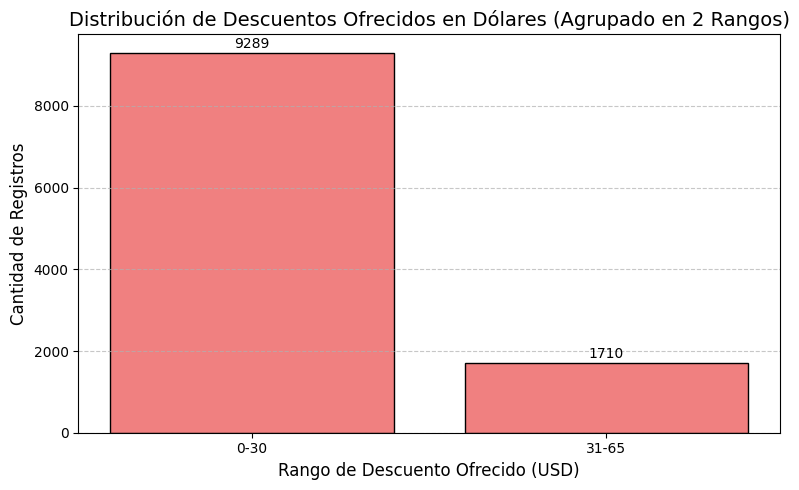

In [45]:
# Código para Discount_offered

# Contar la cantidad de valores únicos en la columna "Discount_offered"
print('COLUMNA "Discount_offered": Descuento ofrecido en productos específicos.')
print('')

unique_discount_offered = df['Discount_offered'].nunique()
print(f"Cantidad de valores únicos en 'Discount_offered': {unique_discount_offered}")

# Ver el tipo de dato de la columna "Discount_offered"
discount_offered_dtype = df['Discount_offered'].dtype
print(f"Tipo de dato de la columna 'Discount_offered': {discount_offered_dtype}")

# Definir los rangos de descuento en 2 grupos
bins = [0, 30, 65]  # Dos rangos: 0-30 y 31-65
labels = ['0-30', '31-65']  # Etiquetas de los rangos

# Agrupar los valores de "Discount_offered" en los dos rangos
df['Discount_range'] = pd.cut(df['Discount_offered'], bins=bins, labels=labels, include_lowest=True)

# Contar la cantidad de registros en cada rango de descuento
discount_range_values = df['Discount_range'].value_counts().sort_index()

# Crear un gráfico de barras para los rangos de descuento
plt.figure(figsize=(8, 5))
bars = plt.bar(discount_range_values.index, discount_range_values.values, color='lightcoral', edgecolor='black')

# Añadir etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontsize=10)

# Mejorar los ejes y el título, indicando que el descuento es en dólares en el eje X
plt.xlabel('Rango de Descuento Ofrecido (USD)', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.title('Distribución de Descuentos Ofrecidos en Dólares (Agrupado en 2 Rangos)', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [46]:
# Código para Reached.on.Time_Y.N

# Contar la cantidad de valores únicos en la columna "Reached.on.Time_Y.N"
print('COLUMNA "Reached.on.Time_Y.N": Es la variable objetivo, donde 1 indica que el producto NO ha llegado a tiempo y 0 indica que ha llegado a tiempo.')
print('')

unique_reached_on_time = df['Reached.on.Time_Y.N'].nunique()
print(f"Cantidad de valores únicos en 'Reached.on.Time_Y.N': {unique_reached_on_time}")

# Ver el tipo de dato de la columna "Reached.on.Time_Y.N"
reached_on_time_dtype = df['Reached.on.Time_Y.N'].dtype
print(f"Tipo de dato de la columna 'Reached.on.Time_Y.N': {reached_on_time_dtype}")

print('')
# Mostrar los valores únicos y la cantidad de registros en la columna "Reached.on.Time_Y.N"
reached_on_time_values = df['Reached.on.Time_Y.N'].value_counts()
print(reached_on_time_values)


COLUMNA "Reached.on.Time_Y.N": Es la variable objetivo, donde 1 indica que el producto NO ha llegado a tiempo y 0 indica que ha llegado a tiempo.

Cantidad de valores únicos en 'Reached.on.Time_Y.N': 2
Tipo de dato de la columna 'Reached.on.Time_Y.N': int64

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


# <span style="color:Orange"> ETAPA 3: Realización e interpretación de gráficos
## A continuación se crean gráficos con Matplotlib y Seaborn utilizando parámetros adicionales:

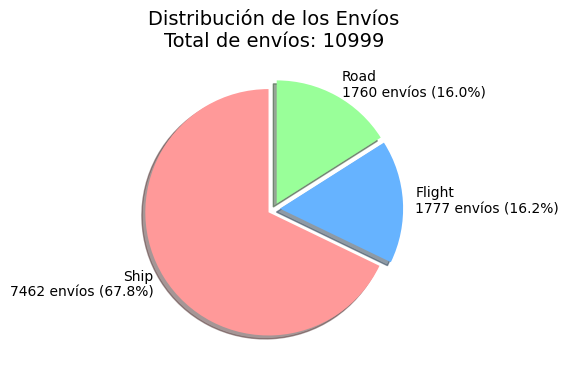

In [47]:
# Contar la cantidad de envíos por cada "Mode_of_Shipment"
shipment_counts = df['Mode_of_Shipment'].value_counts()

# Total de envíos
total_shipments = shipment_counts.sum()

# Crear gráfico circular
plt.figure(figsize=(7, 4))
# Crear la etiqueta con el valor absoluto y el porcentaje
labels = [f'{mode}\n{count} envíos ({count/total_shipments:.1%})' for mode, count in zip(shipment_counts.index, shipment_counts)]

# Generar gráfico circular con las etiquetas ajustadas
plt.pie(shipment_counts, labels=labels, autopct=None, startangle=90, colors=['#ff9999','#66b3ff','#99ff99'], explode=(0.05, 0.05, 0.05), shadow=True)

# Título con la cantidad total de envíos
plt.title(f'Distribución de los Envíos\nTotal de envíos: {total_shipments}', fontsize=14)

# Mostrar el gráfico
plt.show()

### INSIGHT: **"Distribución de los Envíos"**

- El envío por barco (Ship) domina la mayoría de las operaciones de envío, posiblemente debido a su capacidad de transportar grandes cargas a bajo costo. En términos numéricos, esta modalidad representa al 67.8% de los envíos y equivale a 7462 despachos diferentes. 

- Los envíos por carretera (Road) y vuelo (Flight) tienen una distribución similar entre sí.

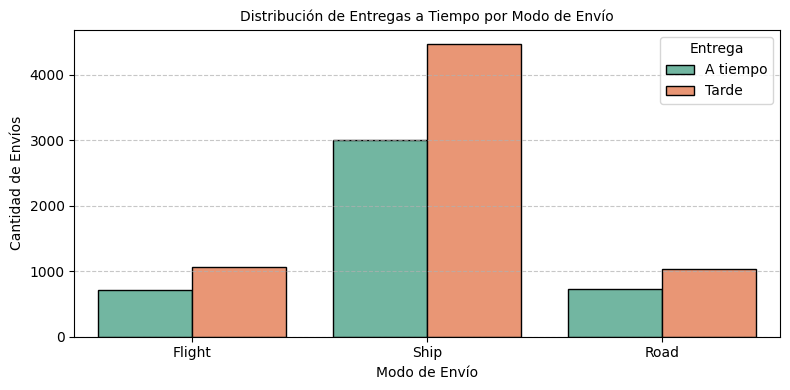

In [48]:
# Crear gráfico de barras agrupado por "Mode_of_Shipment" y "Reached.on.Time_Y.N" usando hue 
plt.figure(figsize=(8, 4))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df, palette='Set2', edgecolor='black')

# Configuraciones adicionales
plt.title('Distribución de Entregas a Tiempo por Modo de Envío', fontsize=10)
plt.xlabel('Modo de Envío', fontsize=10)
plt.ylabel('Cantidad de Envíos', fontsize=10)
labels = {0: 'A tiempo', 1: 'Tarde'}

# Reemplazar las etiquetas en la leyenda
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=[labels[int(label)] for label in labels], title='Entrega', loc='upper right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### INSIGHT: **"Distribución de Entregas a Tiempo por Modo de Envío"**

- En los tres medios de transporte, predominan las llegadas tarde respecto de las llegadas a tiempo. 

- El modo de envío en barco (Ship) se presenta como el menos confiable en términos de entregas a tiempo. 

- El número de envíos realizados via aérea (Flight) siendo el medio de transporte más rápido en términos de velocidad del medio de transporte, acumula mayor cantidad de llegadas tarde que el transporte terrestre.

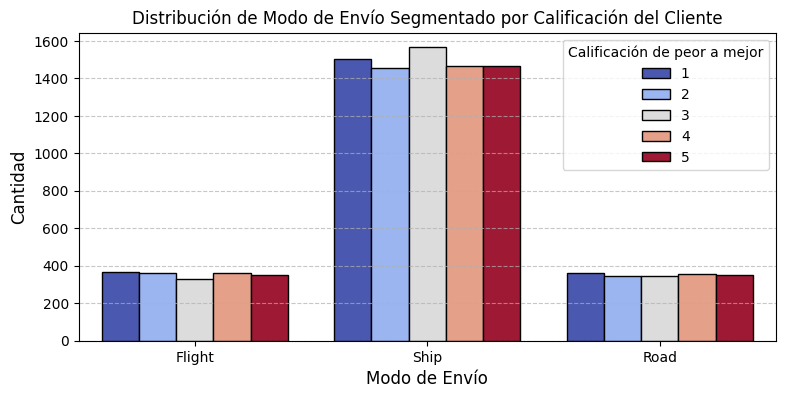

In [49]:
# Gráfico de barras con Seaborn para visualizar la distribución de "Mode_of_Shipment" segmentada por "Customer_rating"
plt.figure(figsize=(9, 4))
sns.countplot(x='Mode_of_Shipment', hue='Customer_rating', data=df, palette='coolwarm', edgecolor='black')
plt.title('Distribución de Modo de Envío Segmentado por Calificación del Cliente', fontsize=12)
plt.xlabel('Modo de Envío', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Calificación de peor a mejor', loc='upper right')
plt.show()

### INSIGHT: **"Distribución de Modo de Envío Segmentado por Calificación del Cliente"**

- En el modo de envío marítimo las barras predominantes son 3 y 1: los retrasos pueden afectar negativamente la percepción del cliente a la hora de valorar el servicio. No obstante, a pesar de que en el análisis anterior se puso en relieve que proporcionalmente muchos envíos llegan tarde, las valoraciones 5 y 4 están casi al mismo nivel que la valoración 2, esta distribución homogénea da a entender que las demoras son compensadas con el precio bajo y/o que los clientes no tienen expectativas altas respecto al tiempo de entrega. 

- Tanto para el envío por vuelo como por carretera, las calificaciones indican que algunos clientes están satisfechos, mientras que otros no. Esto refleja inconsistencias en los servicios debido a la puntualidad o a las expectativas del cliente en cuanto al precio o calidad.

- Respecto al envío aéreo, al ser más rápido y costoso, no parece presentar una mayor satisfacción al cliente en general. Algo podría estar fallando entre el precio y la rapidez.

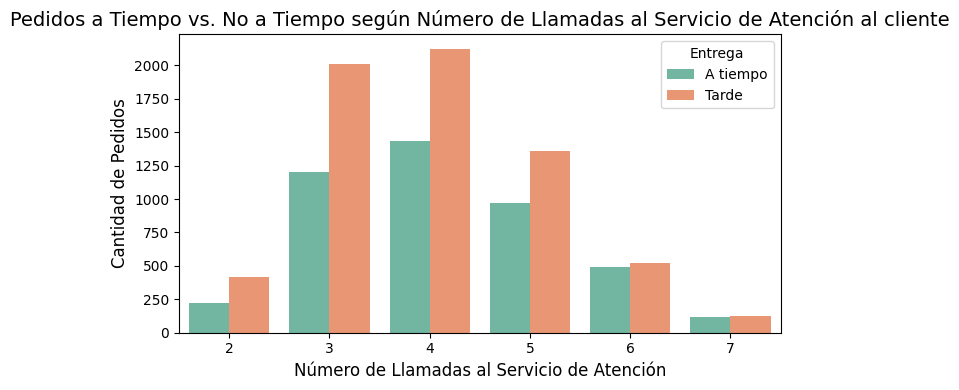

In [50]:
# Crear el gráfico de barras
plt.figure(figsize=(7, 4))
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df, palette='Set2')

# Configuraciones adicionales
plt.title('Pedidos a Tiempo vs. No a Tiempo según Número de Llamadas al Servicio de Atención al cliente', fontsize=14)
plt.xlabel('Número de Llamadas al Servicio de Atención', fontsize=12)
plt.ylabel('Cantidad de Pedidos', fontsize=12)
plt.legend(title='Entrega', loc='upper right', labels=['A tiempo', 'Tarde'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### INSIGHT: **"Pedidos a Tiempo vs. No a Tiempo según Número de Llamadas al Servicio de Atención al cliente"**

- Para el rango de 2 a 5 llamadas, los pedidos que no llegaron a tiempo claramente superan en cantidad de aquellos que sí llegaron a tiempo. El número de llamadas al servicio de atención parece estar directamente relacionado con la experiencia del cliente en términos de la puntualidad de la entrega. Aquellos que tienen problemas y necesitan realizar más llamadas tienden a recibir sus pedidos con retraso. 

- A partir de 6 llamadas, las llegadas tarde y a tiempo son similares.


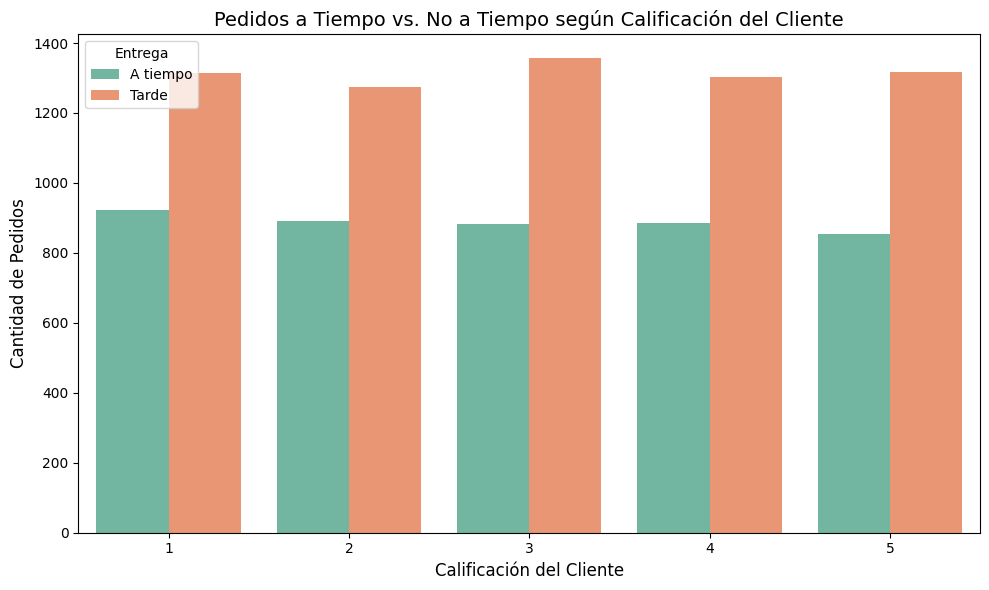

In [51]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_rating', hue='Reached.on.Time_Y.N', data=df, palette='Set2')

# Configuraciones adicionales
plt.title('Pedidos a Tiempo vs. No a Tiempo según Calificación del Cliente', fontsize=14)
plt.xlabel('Calificación del Cliente', fontsize=12)
plt.ylabel('Cantidad de Pedidos', fontsize=12)
plt.legend(title='Entrega', loc='upper left', labels=['A tiempo', 'Tarde'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### INSIGHT: **"Pedidos a Tiempo vs. No a Tiempo según Calificación del Cliente"**

- En todas las calificaciones de los clientes (1 a 5), hay más entregas tardías (color naranja) que entregas a tiempo (color verde). hay un problema general con la puntualidad de las entregas, independientemente de la calificación del cliente. 

- Las calificaciones bajas 1 a 3 no están completamente ligadas al tiempo de entrega ya que los clientes también reciben entregas a tiempo y siguen puntuando bajo. Factores adicionales pueden estar influyendo en la calificación del cliente, como la calidad del producto o el servicio recibido, más allá de la puntualidad de la entrega.

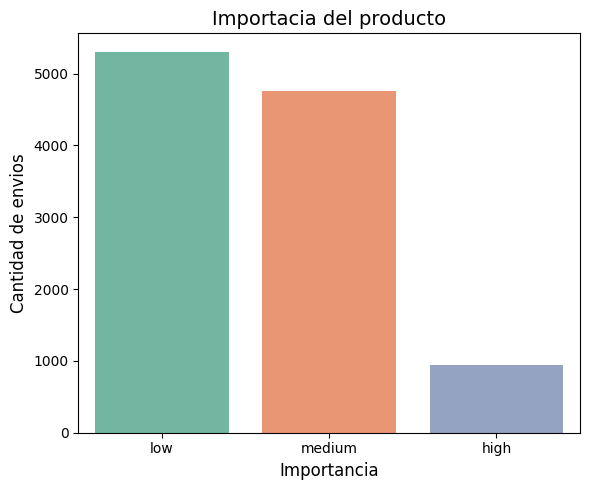

In [52]:
# Crear un gráfico de barras para mostrar la cantidad de productos según su importancia
plt.figure(figsize=(6, 5))
sns.countplot(x='Product_importance', hue='Product_importance', data=df, palette='Set2', legend=False)

# Configuraciones adicionales
plt.title('Importacia del producto', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Cantidad de envios', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### INSIGHT: **"Importacia del producto"**

- Existe una disparidad significativa entre los productos de baja/mediana importancia y los productos de alta importancia en términos de la cantidad de envíos.


<center><h1>  <span style="color:PINK"> SEGUNDA ENTREGA </h1></center>

# <span style="color:Orange"> PUNTO i) Selección del método de feature selection
## Acontinuación se aplica el método SelectKBest para reducir la dimensionalidad del dataset, seleccionando las características más importantes. Esto ayudará a reducir la cantidad de variables y a enfocarnos en las más relevantes.

In [53]:
# Identificar características categóricas y numéricas
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Dividir el dataset en características (X) y variable objetivo (y)
X = df[categorical_features + numerical_features]
y = df['Reached.on.Time_Y.N']

# Crear un preprocesador para transformar las características categóricas y estandarizar las numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# Crear un pipeline para el preprocesamiento y la selección de características
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=4))  # Seleccionar las 5 mejores características
])

# Ajustar el pipeline a los datos
X_new = pipeline.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
selected_feature_indices = pipeline.named_steps['selector'].get_support(indices=True)
selected_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()[selected_feature_indices]

# Para interpretar los resultados, observa las características seleccionadas. Estas representan las variables que, según el análisis estadístico, tienen más influencia en la variable objetivo ('Reached.on.Time_Y.N').
print("Características seleccionadas:")
print("")
for feature in selected_feature_names:
    print(f"- {feature}")
    print("")





Características seleccionadas:

- num__Customer_care_calls

- num__Cost_of_the_Product

- num__Discount_offered

- num__Weight_in_gms



# <span style="color:Orange"> CONCLUSIONES

Las cuatro características seleccionadas como las más influyentes para predecir si un pedido llegará a tiempo son:

- Customer_care_calls: El número de llamadas al servicio de atención al cliente es un factor clave, lo cual podría indicar que problemas recurrentes con los pedidos tienen un impacto significativo en la puntualidad de la entrega. Un mayor número de llamadas puede ser una señal de problemas operativos que afectan la puntualidad.

- Cost_of_the_Product: El costo del producto también influye en la predicción. Es posible que los productos más costosos reciban un trato prioritario o que haya una logística diferente para ellos, lo que podría afectar los tiempos de entrega.

- Discount_offered: El descuento ofrecido está relacionado con la puntualidad de la entrega. Es probable que los pedidos con mayores descuentos sean considerados de menor prioridad, lo que podría contribuir a retrasos en la entrega.

- Weight_in_gms: El peso del producto es otro factor relevante, ya que el peso puede influir en el método de envío utilizado y, por ende, en la puntualidad de la entrega. Productos más pesados podrían requerir logística especial, lo cual podría demorar el proceso.

Estas conclusiones se obtuvieron utilizando la técnica de selección de características SelectKBest del paquete scikit-learn. Esta técnica evalúa cada característica del dataset y selecciona las más relevantes para predecir la variable objetivo, que en este caso es si un pedido llega a tiempo o no.

Las características seleccionadas proporcionan una visión clara de los factores que más afectan la puntualidad en las entregas. Identificar estos factores permite optimizar los procesos internos, enfocarse en las variables con mayor impacto y mejorar la logística para reducir los retrasos y aumentar la satisfacción del cliente

# <span style="color:Orange"> PUNTO ii) Selección del algoritmo 
# <span style="color:Orange"> PUNTO iii) Cálculo de las métricas básicas para validar el modelo**
## A continuación se realiza un proceso completo de análisis y predicción de datos mediante las siguientes etapas:

### Identificación y preprocesamiento de características:

- Se identifican las características categóricas y numéricas del dataset.
Se aplica *OneHotEncoder* para transformar las características categóricas en variables binarias y *StandardScaler* para estandarizar las características numéricas.

### Selección de características:

- Utiliza *SelectKBest* del paquete *scikit-learn* con la función estadística *ANOVA F-value (f_classif)* para seleccionar las 4 características más relevantes para predecir la variable objetivo, "Reached.on.Time_Y.N".

### Entrenamiento de modelo:

- Luego de seleccionar las características más relevantes, el código divide el dataset en conjuntos de entrenamiento y prueba.
Se entrena un modelo de *Random Forest*, un algoritmo de machine learning que combina múltiples árboles de decisión para mejorar la precisión y robustez de las predicciones.

### Evaluación del modelo:

- Utiliza el modelo entrenado para realizar predicciones sobre el conjunto de prueba.

- Finalmente, se evalúa el rendimiento del modelo con métricas como reporte de clasificación (que incluye precisión, sensibilidad y F1-score) y exactitud (accuracy).

Este enfoque permite seleccionar las características más importantes, reducir el ruido en el dataset y, finalmente, entrenar un modelo de *Random Forest* para predecir si un pedido llegará a tiempo o no. El proceso busca optimizar la precisión y eficiencia del modelo, centrándose en las características más influyentes.

In [54]:
# Identificar características categóricas y numéricas
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Dividir el dataset en características (X) y variable objetivo (y)
X = df[categorical_features + numerical_features]
y = df['Reached.on.Time_Y.N']

# Crear un preprocesador para transformar las características categóricas y estandarizar las numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# Crear un pipeline para el preprocesamiento y la selección de características
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=4))  # Seleccionar las 4 mejores características
])

# Ajustar el pipeline a los datos
X_new = pipeline.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
selected_feature_indices = pipeline.named_steps['selector'].get_support(indices=True)
selected_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()[selected_feature_indices]

# Para interpretar los resultados, observa las características seleccionadas. Estas representan las variables que, según el análisis estadístico, tienen más influencia en la variable objetivo ('Reached.on.Time_Y.N').
print("Características seleccionadas:")
print("")
for feature in selected_feature_names:
    print(f"- {feature}")
    print("")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nExactitud del modelo:", accuracy_score(y_test, y_pred))



Características seleccionadas:

- num__Customer_care_calls

- num__Cost_of_the_Product

- num__Discount_offered

- num__Weight_in_gms


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       895
           1       0.73      0.68      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.66      2200
weighted avg       0.67      0.66      0.66      2200


Exactitud del modelo: 0.6622727272727272


# <span style="color:Orange"> PUNTO iv) conclusiones con base en los resultados obtenidos

## Conclusiones de los Resultados del Modelo Random Forest

Las características seleccionadas que más influyen en la predicción de si un pedido llegará a tiempo son:

 - Customer_care_calls: El número de llamadas al servicio al cliente puede ser un indicador de problemas o dudas sobre el pedido, lo cual puede estar relacionado con demoras en la entrega.

- Cost_of_the_Product: El costo del producto puede influir en la prioridad del envío. Los productos más costosos podrían recibir un tratamiento prioritario, lo que impacta los tiempos de entrega.

- Discount_offered: El descuento ofrecido también está relacionado con la puntualidad del pedido. Podría indicar una posible menor prioridad en la logística de pedidos con mayores descuentos.

- Weight_in_gms: El peso del producto puede afectar la logística del envío, ya que los productos más pesados podrían requerir procesos de transporte más complejos y, por ende, afectar la puntualidad.

## Evaluación del Modelo

- Precisión para la Clase 0 (Pedido Tardío): La precisión para predecir pedidos que llegaron tarde es de 0.58. Esto significa que el 58% de los pedidos predichos como tardíos realmente lo fueron.

- Precisión para la Clase 1 (Pedido a Tiempo): La precisión para predecir pedidos que llegaron a tiempo es de 0.73, lo cual indica que el modelo es mejor para identificar pedidos puntuales que tardíos.

- Exactitud General del Modelo: La exactitud general del modelo es 66.2%, lo cual muestra un rendimiento moderado. Esto sugiere que hay espacio para mejorar el modelo, ya sea ajustando hiperparámetros, seleccionando otras características o utilizando un modelo más complejo.

## Conclusiones

- Capacidad de Predicción Moderada: El modelo de Random Forest tiene un rendimiento aceptable, pero no excelente. Es capaz de predecir con más precisión los pedidos que llegan a tiempo que los pedidos tardíos.

- Identificación de Factores Clave: Las características seleccionadas (número de llamadas al servicio al cliente, costo del producto, descuento ofrecido y peso del producto) nos brindan información sobre los principales factores que afectan la puntualidad de los pedidos. Esto nos permite enfocar los esfuerzos de mejora en estas áreas.

- Oportunidad de Mejora: Dado que la exactitud es del 66.2%, podría ser conveniente optimizar el modelo ajustando sus hiperparámetros o probando otros algoritmos (como Gradient Boosting o XGBoost) para mejorar su rendimiento.

En resumen, el modelo actual proporciona una base útil para entender los factores que influyen en la puntualidad de las entregas, pero hay margen para mejorar su precisión y capacidad predictiva.